# KITTI Dataset Exploration

In [4]:
# Extract all libraries needed here
import numpy as np
import pykitti
import matplotlib.pyplot as plt
import importlib

from source import parseTrackletXML as xmlParser
from source import dataset_utility as du
import utilities as ut
import projection as proj
importlib.reload(proj)
#import draw_point_cloud as pc
import ground_plane_segmentation as sg

%matplotlib inline  


In [5]:
# Store all parameters here

# Change this to the directory where you store KITTI data
basedir = "/Users/davidwoo/Documents/Projects/self-driving-cars/plane-segmentation/KITTI-Dataset"


In [6]:
date = '2011_09_26'
drive = '0048'
dataset = ut.load_dataset(basedir,date, drive,calibrated=True)


directory = "/Users/davidwoo/Documents/Projects/self-driving-cars/plane-segmentation/KITTI-Dataset"
tracklet_rects, tracklet_types = ut.load_tracklets_for_frames(len(list(dataset.velo)), '{}/{}/{}_drive_{}_sync/tracklet_labels.xml'.format(directory,date, date, drive))


Drive: 2011_09_26_drive_0048_sync

Frame range: None

IMU-to-Velodyne transformation:
[[ 1.      0.0008 -0.002  -0.8087]
 [-0.0008  0.9999 -0.0148  0.3196]
 [ 0.002   0.0148  0.9999 -0.7997]
 [ 0.      0.      0.      1.    ]]

Gray stereo pair baseline [m]: 0.537150600501

RGB stereo pair baseline [m]: 0.532725440079
Parsing tracklet file /Users/davidwoo/Documents/Projects/self-driving-cars/plane-segmentation/KITTI-Dataset/2011_09_26/2011_09_26_drive_0048_sync/tracklet_labels.xml
File contains 8 tracklets
Loaded 8 tracklets.
[<source.parseTrackletXML.Tracklet object at 0x11599f128>, <source.parseTrackletXML.Tracklet object at 0x1159bef60>, <source.parseTrackletXML.Tracklet object at 0x1159bef98>, <source.parseTrackletXML.Tracklet object at 0x1159befd0>, <source.parseTrackletXML.Tracklet object at 0x116d78048>, <source.parseTrackletXML.Tracklet object at 0x116d78080>, <source.parseTrackletXML.Tracklet object at 0x116d780b8>, <source.parseTrackletXML.Tracklet object at 0x116d780f0>]
[<

#####

3d Point Cloud Projection on Camera Image

#####

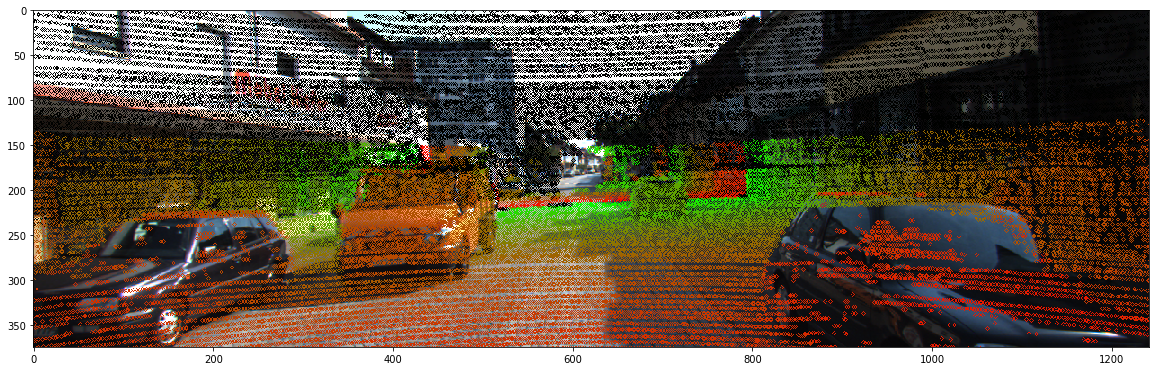

In [7]:
# Submissions #1  - 3d cloud point on camera

import cv2
import statistics
import sys

# Get velodyne points and camera images
dataset_velo = list(dataset.velo)
dataset_rgb = list(dataset.rgb)

# Set parameters
#velodyne_max_x=100  # this scales the x-axis values. maybe replace with range
frame = 0 # the frame that we are interested in
include_z = True # include x-axis for velodyne points. this is mostly used for color coding the velodyne points
radius = 2 # the radius of the circle
calib_dir ="/Users/davidwoo/Documents/Projects/self-driving-cars/plane-segmentation/KITTI-Dataset/2011_09_26/"
calib_file = calib_dir + "calib_velo_to_cam.txt"

# Convert velodyne coordinates to pixel coordinates
velo_image_data,velo_data_raw_sampled = proj.convert_velo_cord_to_img_cord_test(dataset_velo[0],calib_dir)

rgb_img = dataset_rgb[frame][frame]
                              #
# Crop velodyne points outside of image size. Velodyne points might cover wider range than image 
corped_velo_data = proj.crop_to_img_size([400,1500,3], velo_image_data,velo_data_raw_sampled)

result_img = proj.overlay_velo_img(rgb_img, corped_velo_data,radius)
plt.imshow(result_img)
    


(119977, 4)
(119977, 3)


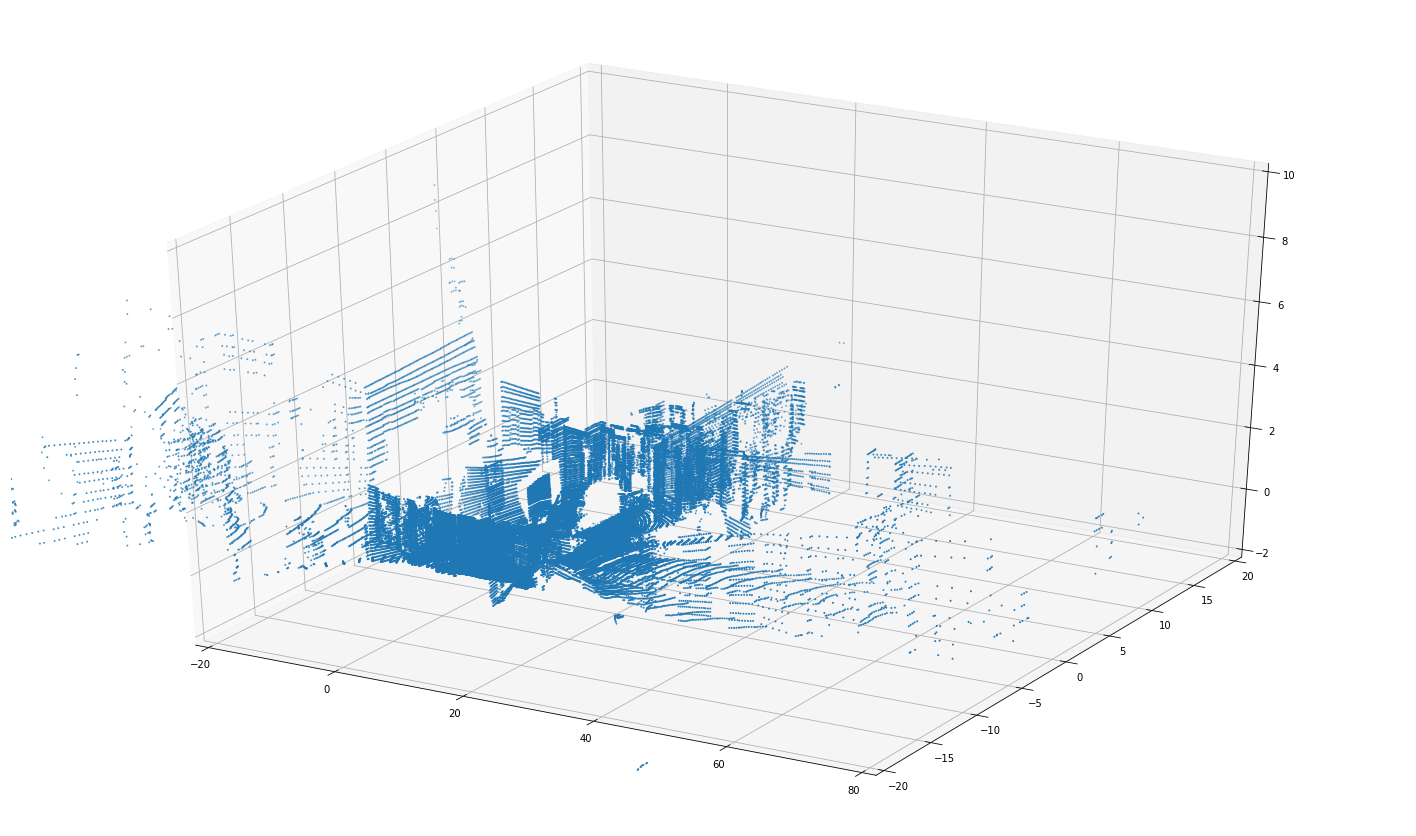

In [46]:
# 1. show points in 3d
# is it 116k points in one frame. this is a lot
print(dataset_velo[0].shape)

print(dataset_velo[0][:,0:3].shape)

def plot_pc_3d(dataset_pc):
    fig = plt.figure(figsize = (25,15))
    ax = fig.add_subplot(111,projection ="3d")
    ax.scatter(dataset_pc[:,0],dataset_pc[:,1],dataset_pc[:,2],s=1)
    ax.set_zlim3d(-2,10)
    ax.set_ylim3d(-20,20)
    ax.set_xlim3d(-20,80)
    plt.show()
    
def plot_pc_2d(dataset_pc):
    fig = plt.figure(figsize = (25,15))
    ax = fig.add_subplot(111)
    ax.scatter(dataset_pc[:,0],dataset_pc[:,1],s=1)
    #ax.set_zlim3d(-2,10)
    ax.set_ylim(-20,20)
    ax.set_xlim(-20,80)
    plt.show()
    
plot_pc_3d(dataset_velo[0])

# this is the original but still find it hard to see the cars here

# either plot this as a movie, to see more frames or reduce the number of data pointss

# try sampling first. naive version is sample every point


119977
(23995, 4)


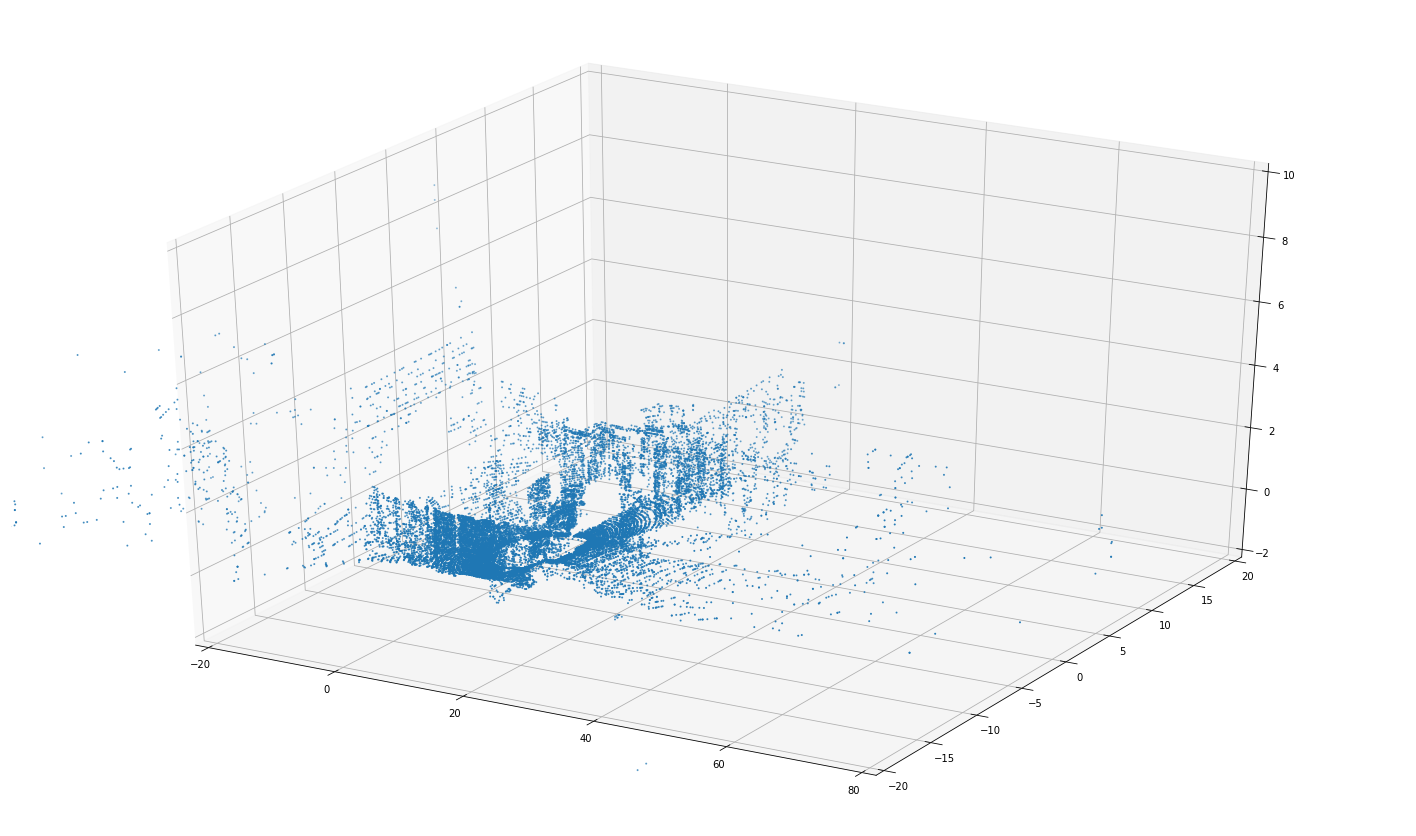

In [40]:
import random
print(len(dataset_velo[0]))
print((dataset_velo[0][np.random.randint(len(dataset_velo[0]),size = int(len(dataset_velo[0]) *0.2 )),:]).shape)

dataset_velo_sp = (dataset_velo[0][np.random.randint(len(dataset_velo[0]),size = int(len(dataset_velo[0]) *0.2 )),:])

plot_pc_3d(dataset_velo_sp)
# abit easier to see but more sparse

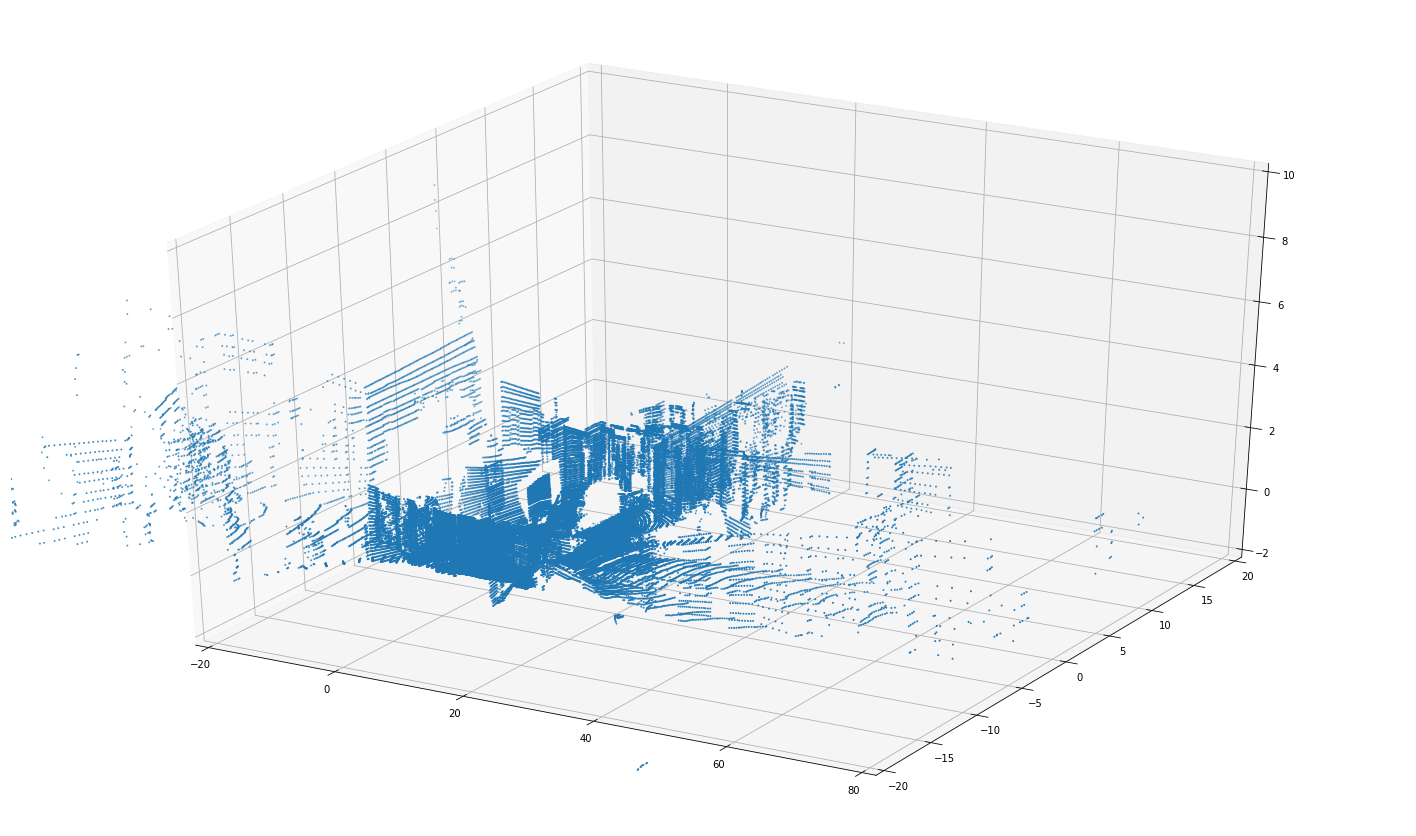

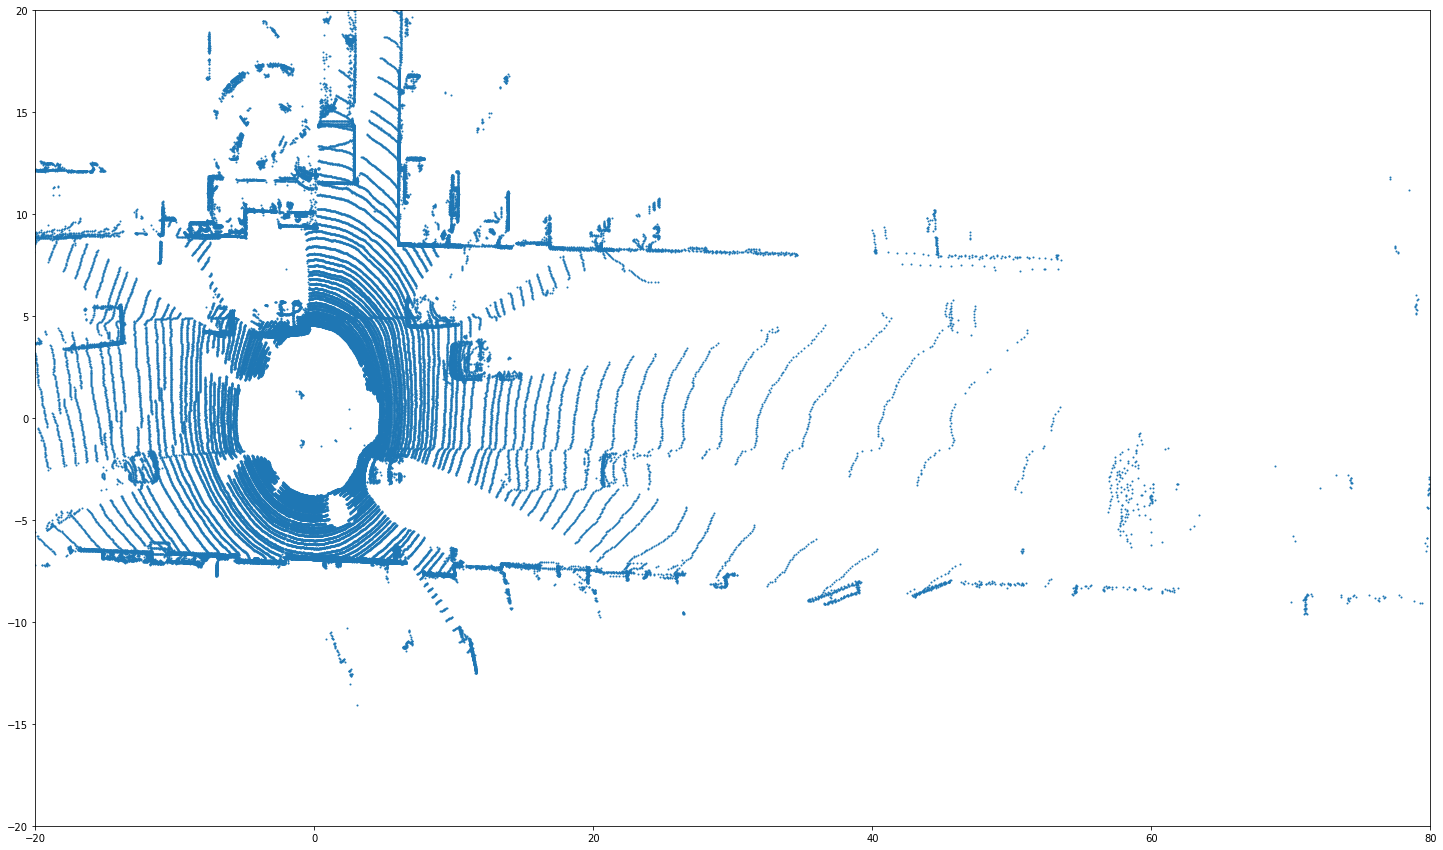

In [49]:
index = range(0,len(dataset_velo[0]),1)
dataset_velo_sp = (dataset_velo[0][index,:])
plot_pc_3d(dataset_velo_sp)

# ok so we sample in equal increments.
# Bird's eye view is definetely the clearest
plot_pc_2d(dataset_velo_sp)

# this also gives us clue on why the bounding box may be unclear

3
42187
42187
42187
[ True  True  True ...,  True  True  True]
[ 508.8023  506.4684  501.8596 ...,  619.2845  618.8547  616.4643]
[ 153.8081  153.8557  153.7813 ...,  396.8057  396.9931  397.0717]
[ 52.301  50.572  48.788 ...,   5.712   5.733   5.738]
r % , g % , b % 0 254 0
r % , g % , b % 0 254 0
r % , g % , b % 0 254 0
r % , g % , b % 0 254 0
r % , g % , b % 9 245 0
r % , g % , b % 9 245 0
r % , g % , b % 9 245 0
r % , g % , b % 9 245 0
r % , g % , b % 9 245 0
r % , g % , b % 9 245 0
r % , g % , b % 9 245 0
r % , g % , b % 9 245 0
r % , g % , b % 9 245 0
r % , g % , b % 16 238 0
r % , g % , b % 16 238 0
r % , g % , b % 16 238 0
r % , g % , b % 16 238 0
r % , g % , b % 16 238 0
r % , g % , b % 16 238 0
r % , g % , b % 25 229 0
r % , g % , b % 25 229 0
r % , g % , b % 25 229 0
r % , g % , b % 25 229 0
r % , g % , b % 25 229 0
r % , g % , b % 25 229 0
r % , g % , b % 32 222 0
r % , g % , b % 32 222 0
r % , g % , b % 32 222 0
r % , g % , b % 32 222 0


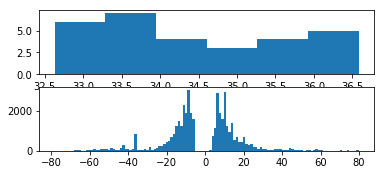

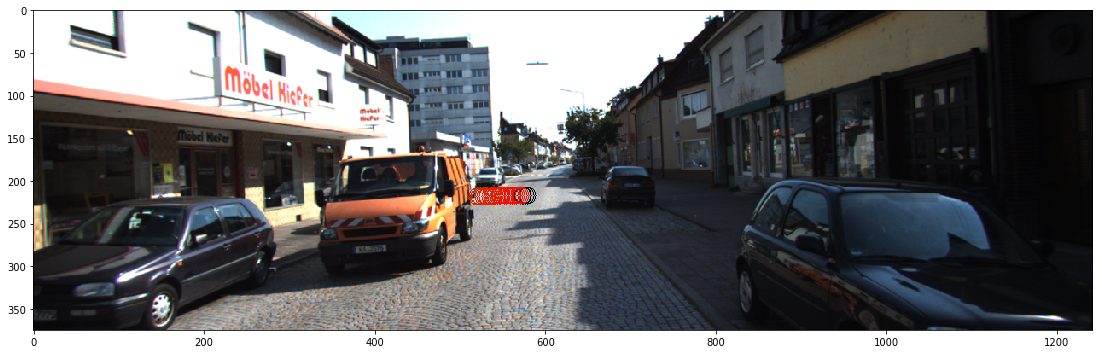

In [75]:
# first narrow down the region

print(len(corped_velo_data))
# each of these are x, y , z points 3 arrays
print(len(corped_velo_data[0]))
print(len(corped_velo_data[1]))
print(len(corped_velo_data[2]))
print(corped_velo_data[0]>200)
print(corped_velo_data[0][corped_velo_data[0]>200])
print(corped_velo_data[1][corped_velo_data[0]>200])
print(corped_velo_data[2][corped_velo_data[0]>200])

x_min = 215
x_max = 220
#x_min = 240
#x_max = 250

y_min = 520
y_max = 580

corped_velo_data_flt = (corped_velo_data[0][(corped_velo_data[1]>x_min) & (corped_velo_data[1]<x_max) & 
                                            (corped_velo_data[0]>y_min) & (corped_velo_data[0]<y_max)], 
corped_velo_data[1][(corped_velo_data[1]>x_min) & (corped_velo_data[1]<x_max) & 
                                            (corped_velo_data[0]>y_min) & (corped_velo_data[0]<y_max)] ,
corped_velo_data[2][(corped_velo_data[1]>x_min) & (corped_velo_data[1]<x_max) & 
                                            (corped_velo_data[0]>y_min) & (corped_velo_data[0]<y_max)] )


# Get velodyne points and camera images
dataset_velo = list(dataset.velo)
dataset_rgb = list(dataset.rgb)

# Set parameters
#velodyne_max_x=100  # this scales the x-axis values. maybe replace with range
frame = 0 # the frame that we are interested in
include_z = True # include x-axis for velodyne points. this is mostly used for color coding the velodyne points
radius = 10 # the radius of the circle
calib_dir ="/Users/davidwoo/Documents/Projects/self-driving-cars/plane-segmentation/KITTI-Dataset/2011_09_26/"
calib_file = calib_dir + "calib_velo_to_cam.txt"

rgb_img = dataset_rgb[frame][frame]

plt.figure(1)
plt.subplot(3,1,1)
plt.hist(corped_velo_data_flt[2],bins = "auto")

plt.subplot(3,1,2)
plt.hist(corped_velo_data[2],bins = "auto")

result_img = proj.overlay_velo_img(rgb_img, corped_velo_data_flt,radius)
plt.subplot(3,1,3)
plt.imshow(result_img)
    

#####

Tracklets on Camera Image ( 2-d bounding boxes)

#####

In [5]:
#main 3d points to camera projection function
def convert_velo_cord_to_img_cord_test(velo_data,calib_dir,cam = 2,tracklet = False):
    
    #step 1: velo to camera coordinates Getting rigid body transformation seems easy
    T_cam_velo = proj.get_rigid_body_transformation(calib_dir + 'calib_velo_to_cam.txt' )
    
    print("T_cam_velo %",T_cam_velo)
    
    #step 2: camera coordinate to image coordinate. projection
    calib = proj.loadCalibrationCamToCam(calib_dir + 'calib_cam_to_cam.txt')

    R_cam_to_rect = np.eye(4, dtype=float)
    R_cam_to_rect[0: 3, 0: 3] = calib['R_rect_00']
    
    print("R_cam_to_rect %",R_cam_to_rect)
    
    #step 3: Create matrix to do RBT, projection, rectification
    transform_matrix = np.dot(np.dot(calib['P_rect_0' + str(cam)],R_cam_to_rect),T_cam_velo)
    
    print("P_rect_0 %",calib['P_rect_0' + str(cam)])
    print("np.dot P_rect_0 %",np.dot(calib['P_rect_0' + str(cam)],R_cam_to_rect))
    
    if tracklet:
        return proj.project(velo_data,transform_matrix)
    else:
        return proj.project(velo_data,transform_matrix),velo_data
    
velo_image_data,velo_data_raw_sampled = convert_velo_cord_to_img_cord_test(dataset_velo[0],calib_dir)
    

T_cam_velo % [[ 0.0075 -1.     -0.0006 -0.0041]
 [ 0.0148  0.0007 -0.9999 -0.0763]
 [ 0.9999  0.0075  0.0148 -0.2718]
 [ 0.      0.      0.      1.    ]]
R_cam_to_rect % [[ 0.9999  0.0098 -0.0074  0.    ]
 [-0.0099  0.9999 -0.0043  0.    ]
 [ 0.0074  0.0044  1.      0.    ]
 [ 0.      0.      0.      1.    ]]
P_rect_0 % [[ 721.5377    0.      609.5593   44.8573]
 [   0.      721.5377  172.854     0.2164]
 [   0.        0.        1.        0.0027]]
np.dot P_rect_0 % [[ 725.9951    9.7509  604.1649   44.8573]
 [  -5.8419  722.2481  169.7606    0.2164]
 [   0.0074    0.0044    1.        0.0027]]


In [6]:
test_1 = np.ones((2,3))
print(test_1)

test_2 = np.ones((3,3))
test_2[1,0] = test_2[1,0]*3
test_2[1,1] = test_2[1,1]*4
test_2[1,2] = test_2[1,2]*5
test_2[1,:] = test_2[1,:]*2
test_2[2,:] = test_2[2,:]*3
print(test_2)

print(np.dot(test_1,test_2))

[[ 1.  1.  1.]
 [ 1.  1.  1.]]
[[  1.   1.   1.]
 [  6.   8.  10.]
 [  3.   3.   3.]]
[[ 10.  12.  14.]
 [ 10.  12.  14.]]


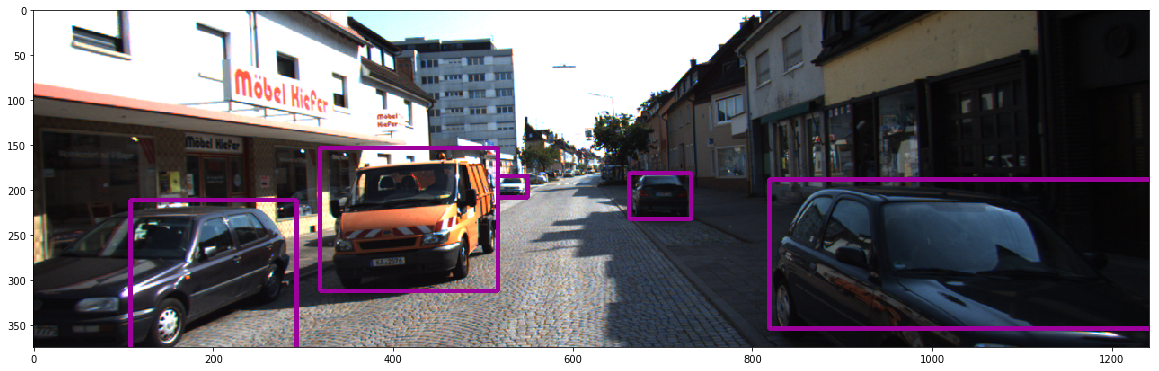

In [7]:
####2d box projection ####

#load velodyne and images
dataset_rgb = list(dataset.rgb)
rgb_img = dataset_rgb[frame][frame]
dataset_velo = list(dataset.velo)

#settings
max_iter = 0
frame = 0
tracklet = 0

for rect in tracklet_rects[frame]:
    
    dataset_tracklets = rect.transpose(1,0)
    
    velo_data_tracklets = proj.convert_velo_cord_to_img_cord_test(dataset_tracklets, calib_dir,2,True)

    corped_velo_data_tracklets = proj.crop_to_img_size([400,1500,3], velo_data_tracklets,dataset_velo[0])

    cv2.rectangle(rgb_img, 
                  (int(min(corped_velo_data_tracklets[0])),int(min(corped_velo_data_tracklets[1]))),
                  (int(max(corped_velo_data_tracklets[0])),int(max(corped_velo_data_tracklets[1]))), 
                  (100,255,100), 3)

fig1 = plt.figure(figsize=(20, 20))
plt.imshow(rgb_img)

8
[[517 263]
 [417 265]
 [320 312]
 [476 309]
 [516 162]
 [416 163]
 [319 154]
 [475 153]]


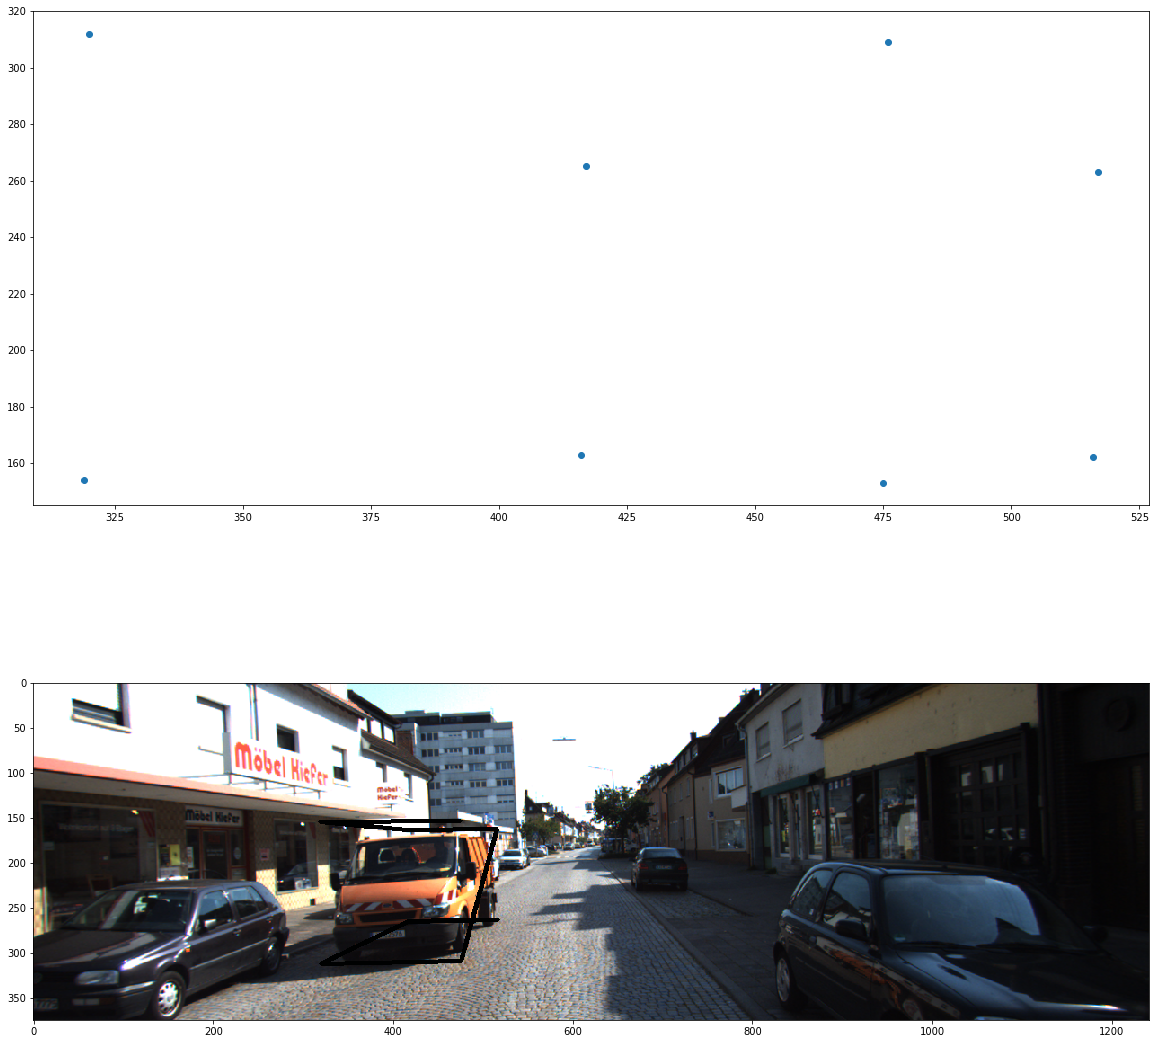

In [109]:
####2d box projection ####

#load velodyne and images
dataset_rgb = list(dataset.rgb)
rgb_img = dataset_rgb[frame][frame]
dataset_velo = list(dataset.velo)

#settings
max_iter = 0
frame = 0
tracklet = 0

#for rect in tracklet_rects[frame]:
    
rect = tracklet_rects[frame][0]
    
dataset_tracklets = rect.transpose(1,0)
    
velo_data_tracklets = proj.convert_velo_cord_to_img_cord_test(dataset_tracklets, calib_dir,2,True)

corped_velo_data_tracklets = proj.crop_to_img_size([400,1500,3], velo_data_tracklets,dataset_velo[0])
print(len(corped_velo_data_tracklets[0]))

vrx = np.empty((len(corped_velo_data_tracklets[0]),2), np.int32)
#corped_velo_data_tracklets[0]
               
for i in range(0,len(corped_velo_data_tracklets[0])):
#for i in range(len(10)):

    if abs(vrx[j][0] - vrx[i][0] ) < max_x_width/4 and abs(vrx[j][1] - vrx[i][1] ) < max_y_height :
    
    vrx[i] = np.array((corped_velo_data_tracklets[0][i],corped_velo_data_tracklets[1][i]), np.int32)

print(vrx)
x = vrx[:,0]
y = vrx[:,1]
vrx.reshape((-1,1,2))
rgb_img = cv2.polylines(rgb_img,[vrx],False,(0,255,255),3)

fig1 = plt.figure(figsize=(20, 20))
plt.subplot(2,1,1)
plt.scatter(x,y)

plt.subplot(2,1,2)
plt.imshow(rgb_img)

8
159 198
pair found % % [517 263] [517 263]
pair found % % [517 263] [417 265]
pair found % % [517 263] [476 309]
pair found % % [517 263] [516 162]
pair found % % [517 263] [475 153]
pair found % % [417 265] [517 263]
pair found % % [417 265] [417 265]
pair found % % [417 265] [320 312]
pair found % % [417 265] [476 309]
pair found % % [417 265] [416 163]
pair found % % [320 312] [417 265]
pair found % % [320 312] [320 312]
pair found % % [320 312] [476 309]
pair found % % [320 312] [319 154]
pair found % % [476 309] [517 263]
pair found % % [476 309] [417 265]
pair found % % [476 309] [320 312]
pair found % % [476 309] [476 309]
pair found % % [476 309] [516 162]
pair found % % [476 309] [475 153]
pair found % % [516 162] [517 263]
pair found % % [516 162] [476 309]
pair found % % [516 162] [516 162]
pair found % % [516 162] [416 163]
pair found % % [516 162] [475 153]
pair found % % [416 163] [417 265]
pair found % % [416 163] [516 162]
pair found % % [416 163] [416 163]
pair found

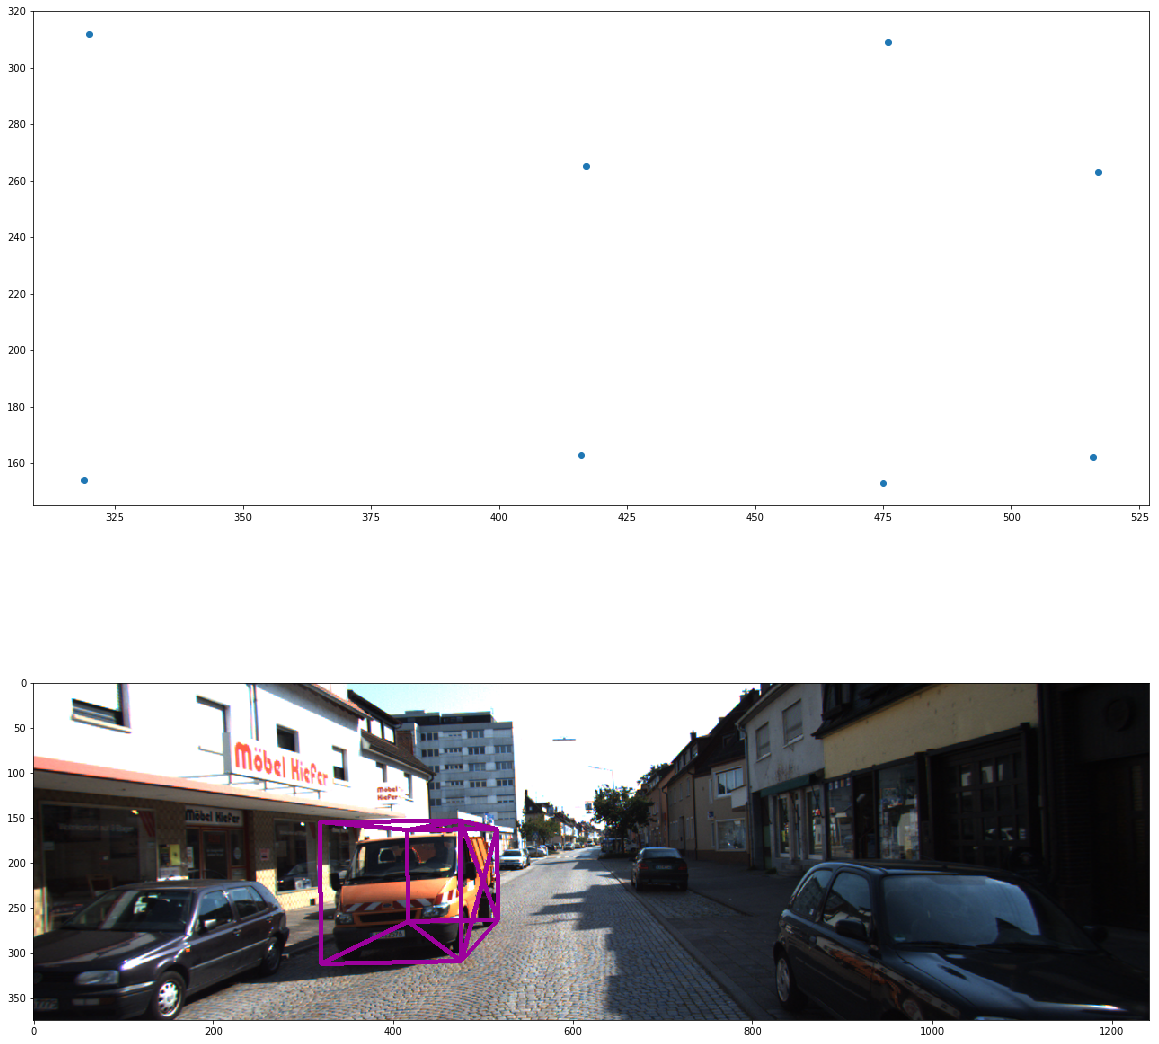

In [147]:
# Naive way to an x scan and then a y scan

####2d box projection ####

#load velodyne and images
dataset_rgb = list(dataset.rgb)
rgb_img = dataset_rgb[frame][frame]
dataset_velo = list(dataset.velo)

#settings
max_iter = 0
frame = 0
tracklet = 0

#for rect in tracklet_rects[frame]:
    
rect = tracklet_rects[frame][0]
    
dataset_tracklets = rect.transpose(1,0)
    
velo_data_tracklets = proj.convert_velo_cord_to_img_cord_test(dataset_tracklets, calib_dir,2,True)

corped_velo_data_tracklets = proj.crop_to_img_size([400,1500,3], velo_data_tracklets,dataset_velo[0])
print(len(corped_velo_data_tracklets[0]))

vrx = np.empty((len(corped_velo_data_tracklets[0]),2), np.int32)
#corped_velo_data_tracklets[0]
               
for i in range(0,len(corped_velo_data_tracklets[0])):
#for i in range(len(10)):

    vrx[i] = np.array((corped_velo_data_tracklets[0][i],corped_velo_data_tracklets[1][i]), np.int32)

    
max_y_height = int(max(corped_velo_data_tracklets[1])) -  int(min(corped_velo_data_tracklets[1]))
max_x_width = int(max(corped_velo_data_tracklets[0])) -  int(min(corped_velo_data_tracklets[0]))

print(max_y_height,max_x_width)
    
delta = 0.10
for i in range(len(vrx)):
    #print(i,vrx[i])
    for j in range(len(vrx)):
        if abs(vrx[j][0] - vrx[i][0] ) < max_x_width/4 and abs(vrx[j][1] - vrx[i][1] ) < max_y_height :
            print("pair found % %",vrx[i],vrx[j])
            rgb_img = cv2.line(rgb_img,(vrx[i][0],vrx[i][1]),(vrx[j][0],vrx[j][1]),(100,255,100),3)
        elif abs(vrx[j][0] - vrx[i][0] ) < max_x_width*0.80 and abs(vrx[j][1] - vrx[i][1] ) < max_y_height/2 :
            print("pair found % %",vrx[i],vrx[j])
            rgb_img = cv2.line(rgb_img,(vrx[i][0],vrx[i][1]),(vrx[j][0],vrx[j][1]),(100,255,100),3)

#print(vrx)
x = vrx[:,0]
y = vrx[:,1]
vrx.reshape((-1,1,2))
#rgb_img = cv2.polylines(rgb_img,[vrx],False,(0,255,255),3)

fig1 = plt.figure(figsize=(20, 20))
plt.subplot(2,1,1)
plt.scatter(x,y)

plt.subplot(2,1,2)
plt.imshow(rgb_img)


tracklets % [[ 10.4328   4.5253  -1.8566]
 [ 10.3897   6.1115  -1.8566]
 [  6.5042   6.0059  -1.8566]
 [  6.5473   4.4197  -1.8566]
 [ 10.4328   4.5253  -0.4584]
 [ 10.3897   6.1115  -0.4584]
 [  6.5042   6.0059  -0.4584]
 [  6.5473   4.4197  -0.4584]]
corped_velo_data_tracklets % (array([ 293.3224,  178.6825,  109.0719,  292.7283,  178.2514,  108.539 ]), array([ 310.687 ,  312.4374,  391.4442,  211.1872,  212.513 ,  230.1307]), array([ 52.301,  50.572,  48.753,  47.989,  47.162,  45.621], dtype=float32))
8
6
tracklets [[ 10.4328   4.5253  -1.8566]
 [ 10.3897   6.1115  -1.8566]
 [  6.5042   6.0059  -1.8566]
 [  6.5473   4.4197  -1.8566]
 [ 10.4328   4.5253  -0.4584]
 [ 10.3897   6.1115  -0.4584]
 [  6.5042   6.0059  -0.4584]
 [  6.5473   4.4197  -0.4584]]


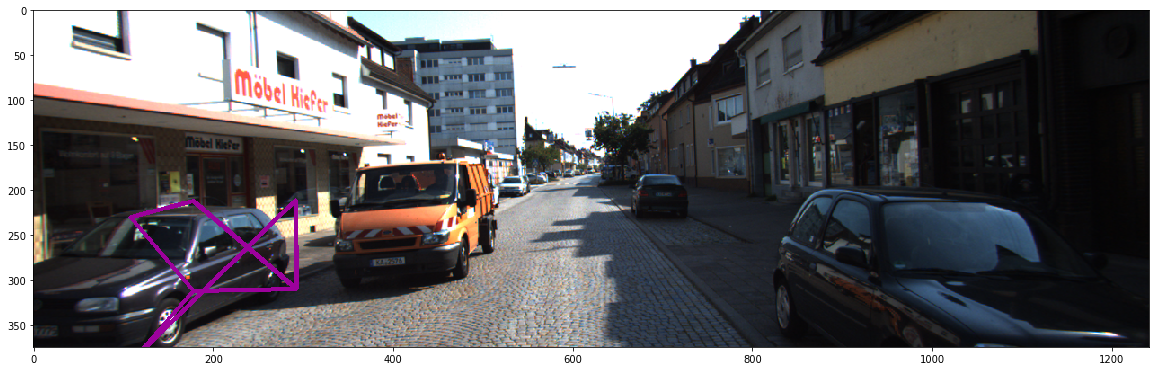

In [186]:
# Naive way to an x scan and then a y scan

####2d box projection ####

#load velodyne and images
dataset_rgb = list(dataset.rgb)
rgb_img = dataset_rgb[frame][frame]
dataset_velo = list(dataset.velo)

#settings
max_iter = 0
frame = 0
tracklet = 0

#for rect in tracklet_rects[frame]:
    
rect = tracklet_rects[frame][1]
    
dataset_tracklets = rect.transpose(1,0)
    
velo_data_tracklets = proj.convert_velo_cord_to_img_cord_test(dataset_tracklets, calib_dir,2,True)

corped_velo_data_tracklets = proj.crop_to_img_size([400,1500,3], velo_data_tracklets,dataset_velo[0])
print("tracklets %",dataset_tracklets)
print("corped_velo_data_tracklets %",corped_velo_data_tracklets)

vrx = np.empty((len(corped_velo_data_tracklets[0]),2), np.int32)
#corped_velo_data_tracklets[0]

delta = 0.1
print(len(dataset_tracklets))
print(len(corped_velo_data_tracklets[0]))
for i in range(0,len(corped_velo_data_tracklets[0])):
    
    for j in range(0,len(corped_velo_data_tracklets[0])):
        # if x axis , y and z should have no different
        #print("current comparison % %", dataset_tracklets[i],dataset_tracklets[j])
        #print("deltas % % %", abs(dataset_tracklets[i][0] / dataset_tracklets[j][0] - 1  ),
        #     abs(dataset_tracklets[i][1] / dataset_tracklets[j][1] - 1  ),
        #    abs(dataset_tracklets[i][2] / dataset_tracklets[j][2] - 1  ))
        if abs(dataset_tracklets[i][0] / dataset_tracklets[j][0] - 1  ) > delta and abs(dataset_tracklets[i][1] / dataset_tracklets[j][1] - 1  ) < delta and abs(dataset_tracklets[i][2] / dataset_tracklets[j][2] - 1  ) < delta:
            #print ("found % % % %",(corped_velo_data_tracklets[i][0],corped_velo_data_tracklets[i][1]),
            #                   (corped_velo_data_tracklets[j][0],corped_velo_data_tracklets[j][1]))
            rgb_img = cv2.line(rgb_img,(int(corped_velo_data_tracklets[0][i]),int(corped_velo_data_tracklets[1][i])),
                               (int(corped_velo_data_tracklets[0][j]),int(corped_velo_data_tracklets[1][j])),(100,255,100),3)
        elif abs(dataset_tracklets[i][0] / dataset_tracklets[j][0] - 1  ) < delta and abs(dataset_tracklets[i][1] / dataset_tracklets[j][1] - 1  ) > delta and abs(dataset_tracklets[i][2] / dataset_tracklets[j][2] - 1  ) < delta:
            #print ("found % % % %",(corped_velo_data_tracklets[i][0],corped_velo_data_tracklets[i][1]),
            #                   (corped_velo_data_tracklets[j][0],corped_velo_data_tracklets[j][1]))
            rgb_img = cv2.line(rgb_img,(int(corped_velo_data_tracklets[0][i]),int(corped_velo_data_tracklets[1][i])),
                               (int(corped_velo_data_tracklets[0][j]),int(corped_velo_data_tracklets[1][j])),(100,255,100),3)
        elif abs(dataset_tracklets[i][0] / dataset_tracklets[j][0] - 1  ) < delta and abs(dataset_tracklets[i][1] / dataset_tracklets[j][1] - 1  ) < delta and abs(dataset_tracklets[i][2] / dataset_tracklets[j][2] - 1  ) > delta:
            #print ("found % % % %",(corped_velo_data_tracklets[i][0],corped_velo_data_tracklets[i][1]),
            #                   (corped_velo_data_tracklets[j][0],corped_velo_data_tracklets[j][1]))
            rgb_img = cv2.line(rgb_img,(int(corped_velo_data_tracklets[0][i]),int(corped_velo_data_tracklets[1][i])),
                               (int(corped_velo_data_tracklets[0][j]),int(corped_velo_data_tracklets[1][j])),(100,255,100),3)



print("tracklets",dataset_tracklets)


fig1 = plt.figure(figsize=(20, 20))

plt.subplot(2,1,2)
plt.imshow(rgb_img)


tracklets % [[ 14.8897   1.9366  -1.7439]
 [ 14.841    3.9564  -1.7439]
 [  9.6623   3.8316  -1.7439]
 [  9.711    1.8118  -1.7439]
 [ 14.8897   1.9366   0.3022]
 [ 14.841    3.9564   0.3022]
 [  9.6623   3.8316   0.3022]
 [  9.711    1.8118   0.3022]]
corped_velo_data_tracklets % (array([ 517.7704,  417.3281,  320.6517,  476.789 ,  516.8382,  416.5401,
        319.6495,  475.4383]), array([ 263.9882,  265.3242,  312.1372,  309.8265,  162.9052,  163.9035,
        154.7138,  153.2153]), array([ 52.301,  50.572,  48.788,  48.753,  47.989,  47.162,  46.347,
        45.621], dtype=float32))
8
3
i j % % 0 0
current comparison % % [ 14.8897   1.9366  -1.7439] [ 14.8897   1.9366  -1.7439]
deltas % % % 0.0 0.0 0.0
i j % % 0 1
current comparison % % [ 14.8897   1.9366  -1.7439] [ 14.841    3.9564  -1.7439]
deltas % % % 0.00327932681046 0.510519870885 0.0
i j % % 0 2
current comparison % % [ 14.8897   1.9366  -1.7439] [ 9.6623  3.8316 -1.7439]
deltas % % % 0.541008672326 0.494578992966 0.0
i j %

deltas % % % 0.0237759886816 0.493420689004 0.0
i j % % 2 4
current comparison % % [ 3.1089 -1.6256 -1.6195] [ 6.5408 -3.3688 -0.1816]
deltas % % % 0.524697225696 0.517448204388 7.91949133007
i j % % 2 5
current comparison % % [ 3.1089 -1.6256 -1.6195] [ 6.613  -1.7854 -0.1816]
deltas % % % 0.529886501061 0.0894951954504 7.91949133007
i j % % 3 0
current comparison % % [ 3.0367 -3.209  -1.6195] [ 6.5408 -3.3688 -1.6195]
deltas % % % 0.535735571494 0.0474309054136 0.0
i j % % 3 1
current comparison % % [ 3.0367 -3.209  -1.6195] [ 6.613  -1.7854 -1.6195]
deltas % % % 0.540804332065 0.797358843492 0.0
i j % % 3 2
current comparison % % [ 3.0367 -3.209  -1.6195] [ 3.1089 -1.6256 -1.6195]
deltas % % % 0.023223819414 0.974024557049 0.0
i j % % 3 3
current comparison % % [ 3.0367 -3.209  -1.6195] [ 3.0367 -3.209  -1.6195]
deltas % % % 0.0 0.0 0.0
i j % % 3 4
current comparison % % [ 3.0367 -3.209  -1.6195] [ 6.5408 -3.3688 -0.1816]
deltas % % % 0.535735571494 0.0474309054136 7.91949133007
i j

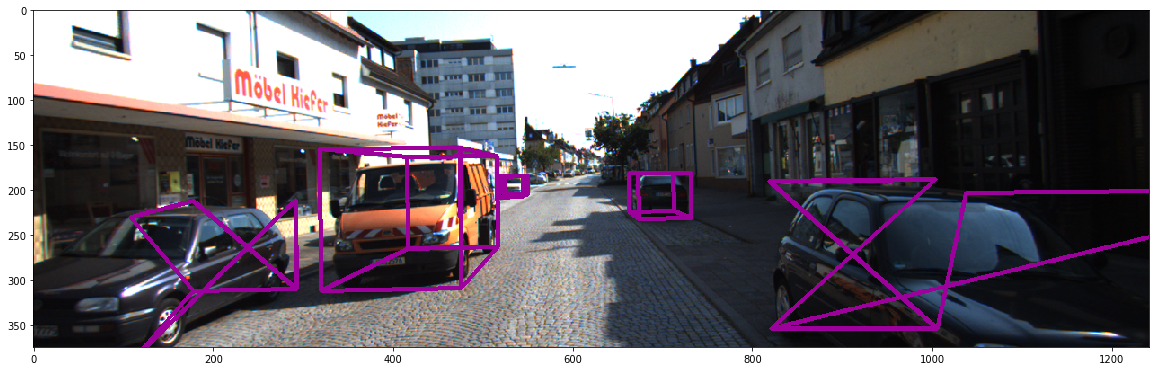

In [187]:
# Naive way to an x scan and then a y scan

# Did it. also think somethign funny with the projected points.

####2d box projection ####

#load velodyne and images
dataset_rgb = list(dataset.rgb)
rgb_img = dataset_rgb[frame][frame]
dataset_velo = list(dataset.velo)

#settings
max_iter = 0
frame = 0
tracklet = 0

for rect in tracklet_rects[frame]:
    
#rect = tracklet_rects[frame][0]
    
    dataset_tracklets = rect.transpose(1,0)

    velo_data_tracklets = proj.convert_velo_cord_to_img_cord_test(dataset_tracklets, calib_dir,2,True)

    corped_velo_data_tracklets = proj.crop_to_img_size([400,1500,3], velo_data_tracklets,dataset_velo[0])
    print("tracklets %",dataset_tracklets)
    print("corped_velo_data_tracklets %",corped_velo_data_tracklets)

    vrx = np.empty((len(corped_velo_data_tracklets[0]),2), np.int32)
    #corped_velo_data_tracklets[0]

    delta = 0.1
    print(len(dataset_tracklets))
    print(len(corped_velo_data_tracklets))

    for i in range(0,len(corped_velo_data_tracklets[0])):

            for j in range(0,len(corped_velo_data_tracklets[0])):
                # if x axis , y and z should have no different
                print ("i j % %",i,j)
                print("current comparison % %", dataset_tracklets[i],dataset_tracklets[j])
                print("deltas % % %", abs(dataset_tracklets[i][0] / dataset_tracklets[j][0] - 1  ),
                     abs(dataset_tracklets[i][1] / dataset_tracklets[j][1] - 1  ),
                    abs(dataset_tracklets[i][2] / dataset_tracklets[j][2] - 1  ))
                if abs(dataset_tracklets[i][0] / dataset_tracklets[j][0] - 1  ) > delta and abs(dataset_tracklets[i][1] / dataset_tracklets[j][1] - 1  ) < delta and abs(dataset_tracklets[i][2] / dataset_tracklets[j][2] - 1  ) < delta:
                    #print ("found % % % %",(corped_velo_data_tracklets[i][0],corped_velo_data_tracklets[i][1]),
                    #                   (corped_velo_data_tracklets[j][0],corped_velo_data_tracklets[j][1]))
                    rgb_img = cv2.line(rgb_img,(int(corped_velo_data_tracklets[0][i]),int(corped_velo_data_tracklets[1][i])),
                                       (int(corped_velo_data_tracklets[0][j]),int(corped_velo_data_tracklets[1][j])),(100,255,100),3)
                elif abs(dataset_tracklets[i][0] / dataset_tracklets[j][0] - 1  ) < delta and abs(dataset_tracklets[i][1] / dataset_tracklets[j][1] - 1  ) > delta and abs(dataset_tracklets[i][2] / dataset_tracklets[j][2] - 1  ) < delta:
                    #print ("found % % % %",(corped_velo_data_tracklets[i][0],corped_velo_data_tracklets[i][1]),
                    #                   (corped_velo_data_tracklets[j][0],corped_velo_data_tracklets[j][1]))
                    rgb_img = cv2.line(rgb_img,(int(corped_velo_data_tracklets[0][i]),int(corped_velo_data_tracklets[1][i])),
                                       (int(corped_velo_data_tracklets[0][j]),int(corped_velo_data_tracklets[1][j])),(100,255,100),3)
                elif abs(dataset_tracklets[i][0] / dataset_tracklets[j][0] - 1  ) < delta and abs(dataset_tracklets[i][1] / dataset_tracklets[j][1] - 1  ) < delta and abs(dataset_tracklets[i][2] / dataset_tracklets[j][2] - 1  ) > delta:
                    #print ("found % % % %",(corped_velo_data_tracklets[i][0],corped_velo_data_tracklets[i][1]),
                    #                   (corped_velo_data_tracklets[j][0],corped_velo_data_tracklets[j][1]))
                    rgb_img = cv2.line(rgb_img,(int(corped_velo_data_tracklets[0][i]),int(corped_velo_data_tracklets[1][i])),
                                       (int(corped_velo_data_tracklets[0][j]),int(corped_velo_data_tracklets[1][j])),(100,255,100),3)



print("tracklets",dataset_tracklets)


fig1 = plt.figure(figsize=(20, 20))

plt.subplot(2,1,2)
plt.imshow(rgb_img)


#####

Ground Plane Segmentation

#####

goal_inliers % 4798.8
angle % 0.0348099987878
took iterations: 33 best model: [-0.0005  0.0176  0.5064  0.8621] explains: 12276
plotting chart


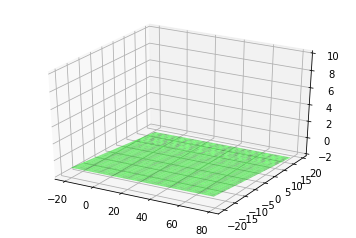

In [8]:
%matplotlib inline

#sample velodyne data in equal increments
frame = 0
dataset_velo = list(dataset.velo)
velo_data= dataset_velo[frame][:, :] 

# ransac parameters
n = int(velo_data.shape[0] * 0.1)
max_iterations = 100
goal_inliers = n * 0.4
inlier_threshold = 0.01
print("goal_inliers %",goal_inliers)

# approximately normal to z-axis
reference_vector =[0,0,1]

#m, b, adj_velo_frame = sg.run_ransac(velo_frame, lambda x, y: is_inlier(x, y, 0.01), int(velo_frame.shape[0] * 0.1), goal_inliers, max_iterations,reference_vector)
m, b, adj_velo_frame = sg.ransac(velo_data, inlier_threshold, n,
                                 goal_inliers, max_iterations,reference_vector)
a, b, c, d = m
xx, yy, zz = sg.plot_plane(a, b, c, d)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim3d(-2, 10)
ax.plot_surface(xx, yy, zz, color=(0, 1, 0, 0.5))


print("plotting chart")
plt.show()

In [9]:
frame = 0
f = plt.figure(figsize=(15, 8))
ax2 = f.add_subplot(111, projection='3d') 

#f, ax3 = plt.subplots(1, 1, figsize=(15, 12))
ut.draw_point_cloud_seg(adj_velo_frame,tracklet_rects, tracklet_types,frame,ax2,'Velodyne scan, XYZ projection, the car is moving in direction left to right')
plt.show()


f, ax3 = plt.subplots(1, 1, figsize=(15, 12))
ut.draw_point_cloud_seg(adj_velo_frame,tracklet_rects, tracklet_types,frame,
    ax3, 
    'Velodyne scan, XY projection (Z = 0), the car is moving in direction left to right', 
    axes=[0, 1] # X and Y axes
)
plt.show()

10


KeyboardInterrupt: 